<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A2%D0%B5%D0%BC%D0%B0_2_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы деревьев решений
## Математические основы деревьев решений  

Деревья решений являются одним из наиболее популярных методов машинного обучения благодаря своей интерпретируемости и эффективности. В данном обзоре рассматриваются основные математические концепции, лежащие в основе алгоритмов на базе деревьев, включая модели деревьев решений (ID3, C4.5, CART), методы бустинга (GBM, AdaBoost, XGBoost, LightGBM) и бэггинга (Bagging Tree, Random Forest, ExtraTrees).  

## Базовые деревья решений  

### Алгоритм ID3  

#### Краткая характеристика  
Алгоритм ID3 (Iterative Dichotomiser 3) осуществляет последовательное разбиение набора данных по признакам, обеспечивающим максимальный критерий информативности.  

#### Критерий информативности  

**Определение**: критерий информативности является мерой уменьшения неопределенности в данных при разбиении по определенному признаку. Он вычисляется на основе понятия энтропии $H(X)$, которая характеризует уровень неопределенности случайной величины.  

Пусть случайная величина $X$ имеет распределение вероятностей $P(X = x_i) = p_i$, где $i = 1, 2, ..., n$. Тогда энтропия определяется как:  
$$
H(X) = -\sum_{i=1}^n p_i \log_2(p_i),
$$  
где $p_i$ — вероятность события $x_i$. Чем выше значение энтропии, тем больше неопределенность случайной величины.  

Критерий информативности $g(D, A)$ набора данных $D$, разделенного по признаку $A$, определяется следующим образом:  
$$
g(D, A) = H(D) - H(D|A),
$$  
где $H(D)$ — энтропия всего набора данных $D$, а $H(D|A)$ — условная энтропия при разбиении по признаку $A$.  



#### Вычисление критерия информативности  

Для вычисления $g(D, A)$ используются следующие шаги:  

1. **Энтропия набора данных $H(D)$**  
Пусть $D$ состоит из $K$ классов $C_1, C_2, ..., C_K$, а доля элементов каждого класса равна $p_k = \frac{|C_k|}{|D|}$. Энтропия всего набора данных определяется как:  
$$
H(D) = -\sum_{k=1}^K p_k \log_2(p_k).
$$  

2. **Условная энтропия $H(D|A)$**  
Если признак $A$ разделяет набор данных $D$ на $n$ подмножеств $D_1, D_2, ..., D_n$, то условная энтропия вычисляется как:  
$$
H(D|A) = \sum_{i=1}^n \frac{|D_i|}{|D|} H(D_i),
$$  
где $H(D_i)$ — энтропия подмножества $D_i$:  
$$
H(D_i) = -\sum_{k=1}^K \frac{|D_{ik}|}{|D_i|} \log_2\left(\frac{|D_{ik}|}{|D_i|}\right),
$$  
а $|D_{ik}|$ — количество элементов класса $C_k$ в подмножестве $D_i$.



#### Алгоритм построения ID3  

**Цель алгоритма**: Построение дерева решений, где на каждом узле выбирается признак, максимизирующий критерий информативности.  

**Входные параметры**:  
- Набор данных $D$;  
- Набор признаков $A$;  
- Порог остановки $\varepsilon$.  

**Выходные параметры**:  
- Построенное дерево решений.  

**Шаги алгоритма**:  

1. Если все элементы в наборе $D$ принадлежат одному классу $C_k$, процесс разделения останавливается, и узел классифицируется как $C_k$.  

2. Если набор признаков $A$ пуст, то узел классифицируется в соответствии с классом, содержащим максимальное количество элементов.  

3. Если признаки доступны, для каждого признака $a \in A$ вычисляется критерий информативности $g(D, a)$. Выбирается признак $a$, обеспечивающий максимальное значение $g(D, a)$.  

4. Если $g(D, a) > \varepsilon$:  
   - Набор данных $D$ разделяется на подмножества $D_1, D_2, ..., D_n$ в зависимости от значений признака $a$.  
   - Для каждого подмножества $D_i$:  
     - Устанавливается $D_i$ в качестве нового набора данных.  
     - Признак $a$ удаляется из набора признаков $A$.  
     - Процесс рекурсивно повторяется.  

5. Если $g(D, a) \leq \varepsilon$, то узел классифицируется в соответствии с классом, содержащим максимальное количество элементов.  

6. Алгоритм завершается, когда дальнейшее разделение невозможно.  



Таким образом, алгоритм ID3 является фундаментальной моделью в области деревьев решений, обеспечивающей интуитивное и математически обоснованное разделение данных. Основной критерий выбора признака для разделения — максимальный критерий информативности, что позволяет эффективно минимизировать неопределенность данных на каждом этапе построения дерева.  




### Числовой пример решения с использованием алгоритма ID3  

Рассмотрим набор данных, содержащий информацию о погоде и о том, играли ли в этот день в теннис. Набор данных включает следующие признаки:  

- **Погода (Outlook):** Солнечно (Sunny), Пасмурно (Overcast), Дождь (Rainy);  
- **Температура (Temperature):** Жарко (Hot), Умеренно (Mild), Прохладно (Cool);  
- **Влажность (Humidity):** Высокая (High), Низкая (Normal);  
- **Ветер (Wind):** Сильный (Strong), Слабый (Weak);  
- **Результат (Play Tennis):** Да (Yes), Нет (No).  



### Шаг 1: Исходные данные  

| **Outlook**  | **Temperature** | **Humidity** | **Wind** | **Play Tennis** |  
|--|--|--|-|--|  
| Sunny        | Hot             | High         | Weak     | No              |  
| Sunny        | Hot             | High         | Strong   | No              |  
| Overcast     | Hot             | High         | Weak     | Yes             |  
| Rainy        | Mild            | High         | Weak     | Yes             |  
| Rainy        | Cool            | Normal       | Weak     | Yes             |  
| Rainy        | Cool            | Normal       | Strong   | No              |  
| Overcast     | Cool            | Normal       | Strong   | Yes             |  
| Sunny        | Mild            | High         | Weak     | No              |  
| Sunny        | Cool            | Normal       | Weak     | Yes             |  
| Rainy        | Mild            | Normal       | Weak     | Yes             |  
| Sunny        | Mild            | Normal       | Strong   | Yes             |  
| Overcast     | Mild            | High         | Strong   | Yes             |  
| Overcast     | Hot             | Normal       | Weak     | Yes             |  
| Rainy        | Mild            | High         | Strong   | No              |  



### Шаг 2: Вычисление общей энтропии  

Обозначим $P(Yes)$ и $P(No)$ как вероятности классов.  

- $P(Yes) = \frac{9}{14}$, $P(No) = \frac{5}{14}$.  

Энтропия всего набора данных:  
$$
H(D) = - P(Yes) \log_2(P(Yes)) - P(No) \log_2(P(No)).
$$  

Подставляем:  
$$
H(D) = -\frac{9}{14} \log_2\left(\frac{9}{14}\right) - \frac{5}{14} \log_2\left(\frac{5}{14}\right).
$$  

Рассчитаем:  
$$
H(D) = -0.643 \cdot \log_2(0.643) - 0.357 \cdot \log_2(0.357) \approx 0.940.
$$  



### Шаг 3: Рассчитаем условную энтропию для признака $\text{Outlook}$  

#### Разделим данные по значениям признака $\text{Outlook}$:  
- **Sunny (5 элементов):** 2 $No$, 3 $Yes$.  
- **Overcast (4 элемента):** 4 $Yes$.  
- **Rainy (5 элементов):** 2 $No$, 3 $Yes$.  

#### Найдем энтропии для каждого подмножества:  

1. **Sunny:**  
$$
H(Sunny) = -\frac{2}{5} \log_2\left(\frac{2}{5}\right) - \frac{3}{5} \log_2\left(\frac{3}{5}\right).
$$  
$$
H(Sunny) \approx -0.4 \cdot \log_2(0.4) - 0.6 \cdot \log_2(0.6) \approx 0.971.
$$  

2. **Overcast:**  
$$
H(Overcast) = -\frac{4}{4} \log_2\left(\frac{4}{4}\right) = 0.
$$  

3. **Rainy:**  
$$
H(Rainy) = -\frac{2}{5} \log_2\left(\frac{2}{5}\right) - \frac{3}{5} \log_2\left(\frac{3}{5}\right).
$$  
$$
H(Rainy) \approx 0.971.
$$  

#### Условная энтропия $H(D|Outlook)$:  
$$
H(D|Outlook) = \frac{5}{14} H(Sunny) + \frac{4}{14} H(Overcast) + \frac{5}{14} H(Rainy).
$$  
Подставляем:  
$$
H(D|Outlook) = \frac{5}{14} \cdot 0.971 + \frac{4}{14} \cdot 0 + \frac{5}{14} \cdot 0.971.
$$  
$$
H(D|Outlook) \approx 0.694.
$$  



### Шаг 4: Вычисление критерия информативности  

Критерий информативности для признака $\text{Outlook}$:  
$$
g(D, Outlook) = H(D) - H(D|Outlook).
$$  
$$
g(D, Outlook) = 0.940 - 0.694 \approx 0.246.
$$  



### Аналогичные вычисления для других признаков  
Проведя аналогичные шаги для признаков $\text{Temperature}$, $\text{Humidity}$, и $\text{Wind}$, выбираем признак с максимальным $g(D, A)$.  




### Шаг 5: Построение дерева  

На основании критерия информативности $g(D, A)$, найденного для каждого признака, мы выбираем признак с максимальным значением. Для нашего примера максимальный $g(D, A) = 0.246$ достигается при разбиении по признаку **Outlook**.  

#### Первый уровень дерева (корневой узел):  
Разделим данные по значению признака **Outlook**:  
- Если **Outlook = Sunny**, подмножество:  
  | **Temperature** | **Humidity** | **Wind** | **Play Tennis** |  
  |--|--|-|--|  
  | Hot             | High         | Weak     | No              |  
  | Hot             | High         | Strong   | No              |  
  | Mild            | High         | Weak     | No              |  
  | Cool            | Normal       | Weak     | Yes             |  
  | Mild            | Normal       | Strong   | Yes             |  

- Если **Outlook = Overcast**, подмножество:  
  | **Temperature** | **Humidity** | **Wind** | **Play Tennis** |  
  |--|--|-|--|  
  | Hot             | High         | Weak     | Yes             |  
  | Cool            | Normal       | Strong   | Yes             |  
  | Mild            | High         | Strong   | Yes             |  
  | Hot             | Normal       | Weak     | Yes             |  

- Если **Outlook = Rainy**, подмножество:  
  | **Temperature** | **Humidity** | **Wind** | **Play Tennis** |  
  |--|--|-|--|  
  | Mild            | High         | Weak     | Yes             |  
  | Cool            | Normal       | Weak     | Yes             |  
  | Cool            | Normal       | Strong   | No              |  
  | Mild            | Normal       | Weak     | Yes             |  
  | Mild            | High         | Strong   | No              |  



#### Узел $\text{Outlook = Overcast}$:  
Все записи в этом подмножестве относятся к классу **Yes**. Это конечный узел:  
- **Outlook = Overcast → Play Tennis = Yes**.  



#### Узел $\text{Outlook = Sunny}$:  
Для подмножества с $\text{Outlook = Sunny}$ мы рассчитываем критерий информативности для оставшихся признаков:  

- **Humidity**:  
  - High → 3 No.  
  - Normal → 2 Yes.  
  - $g(D, Humidity) = 0.971$.  

- **Temperature** и **Wind** дают меньшие критерии информативности.  
Выбираем **Humidity** для разбиения:  
- Если $\text{Humidity = High} → Play Tennis = No$.  
- Если $\text{Humidity = Normal} → Play Tennis = Yes$.  



#### Узел $\text{Outlook = Rainy}$:  
Для подмножества с $\text{Outlook = Rainy}$ также рассчитываем критерий информативности для оставшихся признаков.  
- **Wind**:  
  - Weak → 3 Yes.  
  - Strong → 2 No.  
  - $g(D, Wind) = 0.971$.  

Выбираем **Wind** для разбиения:  
- Если $\text{Wind = Weak} → Play Tennis = Yes$.  
- Если $\text{Wind = Strong} → Play Tennis = No$.  



### Итоговое дерево решений:  

```
               Outlook
              /   |    \
          Sunny  Overcast  Rainy
         /   \      |      /   \
    Humidity  Yes  Wind  Weak  Strong
     /   \          |      |      |
   High Normal     Yes    Yes     No
    No     Yes
```



### Результат:  
Мы построили дерево решений, используя алгоритм ID3. Оно прогнозирует, играть в теннис или нет, основываясь на данных о погоде.  

Если у вас есть вопросы по деталям, дайте знать!



Ниже приведена реализация алгоритма ID3 на Python с использованием библиотеки graphviz для визуализации дерева решений.



In [4]:
import pandas as pd
import numpy as np
from graphviz import Digraph

# Функция для расчета энтропии
def entropy(dataset, target_col):
    values, counts = np.unique(dataset[target_col], return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для расчета прироста информации
def information_gain(dataset, feature, target_col):
    total_entropy = entropy(dataset, target_col)
    values, counts = np.unique(dataset[feature], return_counts=True)
    weighted_entropy = np.sum([
        (counts[i] / np.sum(counts)) * entropy(dataset[dataset[feature] == values[i]], target_col)
        for i in range(len(values))
    ])
    return total_entropy - weighted_entropy

# Функция для построения дерева решений
def id3(dataset, features, target_col, parent=None):
    # Если все примеры относятся к одному классу
    if len(np.unique(dataset[target_col])) == 1:
        return np.unique(dataset[target_col])[0]

    # Если больше нет признаков для разбиения
    if len(features) == 0:
        return dataset[target_col].mode()[0]

    # Выбираем признак с максимальным приростом информации
    gains = [information_gain(dataset, feature, target_col) for feature in features]
    best_feature = features[np.argmax(gains)]

    # Строим дерево
    tree = {best_feature: {}}
    features = [f for f in features if f != best_feature]

    for value in np.unique(dataset[best_feature]):
        subset = dataset[dataset[best_feature] == value]
        subtree = id3(subset, features, target_col, parent=best_feature)
        tree[best_feature][value] = subtree

    return tree

# Функция для визуализации дерева решений
def visualize_tree(tree, graph=None, parent=None, label=None):
    if graph is None:
        graph = Digraph()
        graph.attr("node", shape="box")

    for key, value in tree.items():
        if isinstance(value, dict):
            graph.node(key, key)
            if parent:
                graph.edge(parent, key, label=label)
            for sub_key, sub_value in value.items():
                visualize_tree({sub_key: sub_value}, graph, parent=key, label=str(sub_key))
        else:
            graph.node(str(value), str(value), shape="ellipse")
            graph.edge(parent, str(value), label=str(label))

    return graph

# Пример данных
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play Tennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"],
}

df = pd.DataFrame(data)

# Строим дерево
tree = id3(df, df.columns[:-1].tolist(), "Play Tennis")

# Визуализация
graph = visualize_tree(tree)
graph.render("decision_tree", format="png", cleanup=True)

# Открываем сгенерированное изображение
graph.view()

print("Дерево решений построено и сохранено как decision_tree.png")

Дерево решений построено и сохранено как decision_tree.png



## Модель C4.5

**Краткое резюме:**
Модель C4.5 представляет собой алгоритм, который рекурсивно разделяет набор данных на основе признака, максимизирующего соотношение прироста информации (information gain ratio), а не непосредственно прироста информации.

### a. Пояснение понятия соотношения прироста информации

Соотношение прироста информации $gr(D, A)$ для набора данных $D$, условного на признаке $A$, вычисляется следующим образом:

$$
gr(D, A) = \frac{g(D, A)}{H(D) - H(D|A)}
$$

где:

- $g(D, A)$ — это прирост информации, получаемый при разделении набора данных $D$ по признаку $A$,
- $H(D)$ — энтропия исходного набора данных $D$,
- $H(D|A)$ — условная энтропия набора данных $D$, обусловленная признаком $A$.

Энтропия набора данных $D$, как мера неопределенности или хаоса в данных, рассчитывается с использованием вероятности распределения классов в данном наборе:

$$
H(D) = - \sum_{k=1}^{K} p(C_k) \log p(C_k)
$$

где $p(C_k)$ — это вероятность класса $C_k$ в наборе данных $D$, а $K$ — общее количество классов в $D$.

Кроме того, для вычисления соотношения прироста информации вводится внутренняя ценность признака $A$, обозначаемая как $H_A(D)$, которая характеризует неопределенность, связанную непосредственно с признаком $A$. Это значение определяется как:

$$
H_A(D) = - \sum_{n=1}^{N} p(D_n) \log p(D_n)
$$

где $p(D_n)$ — это вероятность подмножества $D_n$ в наборе данных $D$, полученного в результате разделения по признаку $A$, а $N$ — количество подмножеств.

### b. Алгоритм вычисления соотношения прироста информации

Предположим, что набор данных $D$ состоит из $k$ категорий $C_1, C_2, ..., C_k$, и что признак $A$ может разделить набор данных на $n$ подмножеств $D_1, D_2, ..., D_n$. Для каждого подмножества $D_i$ категориальных элементов $k$ вычисляется вероятность принадлежности к каждой категории.

Алгоритм вычисления соотношения прироста информации включает несколько этапов:

1. **Вычисление энтропии для исходного набора данных $D$:**
   Для этого используется формула:

   $$
   H(D) = - \sum_{k=1}^{K} \frac{|C_k|}{|D|} \log \left(\frac{|C_k|}{|D|}\right)
   $$

   где $|C_k|$ — количество элементов в категории $C_k$, а $|D|$ — общее количество элементов в наборе данных $D$.

2. **Вычисление условной энтропии $H(D|A)$, обусловленной признаком $A$:**
   Если набор данных $D$ разделяется по признаку $A$ на подмножества $D_1, D_2, ..., D_n$, то условная энтропия вычисляется как взвешенная сумма энтропий для каждого подмножества:

   $$
   H(D|A) = \sum_{i=1}^{n} \frac{|D_i|}{|D|} H(D_i)
   $$

   где $H(D_i)$ — это энтропия подмножества $D_i$.

3. **Вычисление соотношения прироста информации $gr(D, A)$:**
   Соотношение прироста информации для признака $A$ вычисляется по формуле:

   $$
   gr(D, A) = \frac{H(D) - H(D|A)}{H_A(D)}
   $$

   где $H_A(D)$ — это внутренняя энтропия признака $A$.

### c. Алгоритм C4.5

Модель C4.5 представляет собой алгоритм построения дерева решений, который на каждом шаге выбирает признак с наибольшим соотношением прироста информации для разделения набора данных. Алгоритм рекурсивно выполняет разделение данных до тех пор, пока не будут выполнены определенные условия остановки.

**Входные данные алгоритма**: набор данных $D$, множество признаков $A$, порог остановки $\epsilon$.

**Выходные данные**: дерево решений C4.5.

### Рекурсивный алгоритм (аналогичен алгоритму ID3):

1. **Прекращение разделения, если все элементы принадлежат одному классу:**
   Если все элементы в наборе данных $D$ уже принадлежат одному классу $C_k$, то дальнейшее разделение на этом узле прекращается, и узел дерева решений помечается как $C_k$.

2. **Прекращение разделения при отсутствии признаков для разделения:**
   Если множество признаков $A$ пусто, то разделение также прекращается, и узел дерева решений помечается классом, который встречается наиболее часто среди элементов набора данных $D$.

3. **Рекурсивное вычисление соотношения прироста информации для каждого признака:**
   Если множество признаков $A$ не пусто, то для каждого признака в $A$ вычисляется его соотношение прироста информации $gr(D, A)$. Если наибольшее соотношение прироста информации $gr_a$ достигается для признака $a$, то выполняется следующее:

   3.1. Если $gr_a$ превышает порог $\epsilon$, то набор данных $D$ делится на подмножества $D_1, D_2, ..., D_n$ в зависимости от значений признака $a$, и процесс продолжается рекурсивно для каждого подмножества.

   3.2. Если $gr_a$ меньше или равно порогу $\epsilon$, то разделение прекращается, и узел дерева решений помечается классом, который встречается наиболее часто среди элементов в подмножестве $D$.


Давайте рассмотрим конкретный числовой пример для вычисления соотношения прироста информации $gr(D, A)$ в модели C4.5. Мы будем использовать простой набор данных для классификации на два класса (например, "Да" и "Нет").

### Шаг 1: Описание набора данных

Предположим, что у нас есть набор данных, состоящий из 10 объектов с двумя признаками: $A$ (например, "Температура") и классом $C$ (например, "Играть в футбол?"). Мы имеем следующие данные:

| Температура (A) | Играть в футбол? (C) |
|--|-|
| Высокая         | Да                   |
| Высокая         | Да                   |
| Низкая          | Нет                  |
| Средняя         | Нет                  |
| Средняя         | Да                   |
| Высокая         | Да                   |
| Средняя         | Нет                  |
| Низкая          | Нет                  |
| Высокая         | Да                   |
| Низкая          | Нет                  |

Теперь мы можем рассчитать энтропию для всего набора данных, а затем для каждого из подмножеств, полученных при разделении по признаку $A$ (Температура).

### Шаг 2: Вычисление энтропии для набора данных $D$

Для начала вычислим энтропию всего набора данных $D$. Мы имеем 10 объектов, из которых 6 объектов принадлежат классу "Да", а 4 — классу "Нет".

Энтропия $H(D)$ для набора данных $D$ вычисляется по формуле:

$$
H(D) = - \sum_{k=1}^{K} p(C_k) \log p(C_k)
$$

где $p(C_k)$ — это вероятность класса $C_k$, а $K$ — количество классов.

В нашем случае:

- $p(\text{Да}) = \frac{6}{10} = 0.6$
- $p(\text{Нет}) = \frac{4}{10} = 0.4$

Теперь вычислим энтропию:

$$
H(D) = - \left( 0.6 \log_2 0.6 + 0.4 \log_2 0.4 \right)
$$

$$
H(D) = - \left( 0.6 \times (-0.736) + 0.4 \times (-1.322) \right)
$$

$$
H(D) = 0.6 \times 0.736 + 0.4 \times 1.322 = 0.4416 + 0.5288 = 0.9704
$$

Итак, энтропия набора данных $D$ составляет $H(D) = 0.9704$.

### Шаг 3: Разделение данных по признаку $A$

Теперь разделим данные по значению признака $A$ (Температура) на три подмножества: $D_{\text{Высокая}}$, $D_{\text{Средняя}}$, и $D_{\text{Низкая}}$.

- Для $D_{\text{Высокая}}$ (Температура = Высокая): 4 объекта, из которых 3 "Да" и 1 "Нет".
- Для $D_{\text{Средняя}}$ (Температура = Средняя): 3 объекта, из которых 1 "Да" и 2 "Нет".
- Для $D_{\text{Низкая}}$ (Температура = Низкая): 3 объекта, из которых 0 "Да" и 3 "Нет".

Теперь вычислим энтропию для каждого подмножества.

#### Энтропия для $D_{\text{Высокая}}$:

Из 4 объектов 3 принадлежат классу "Да", а 1 — классу "Нет". Таким образом, $p(\text{Да}) = \frac{3}{4} = 0.75$ и $p(\text{Нет}) = \frac{1}{4} = 0.25$.

$$
H(D_{\text{Высокая}}) = - \left( 0.75 \log_2 0.75 + 0.25 \log_2 0.25 \right)
$$

$$
H(D_{\text{Высокая}}) = - \left( 0.75 \times (-0.415) + 0.25 \times (-2) \right)
$$

$$
H(D_{\text{Высокая}}) = 0.75 \times 0.415 + 0.25 \times 2 = 0.31125 + 0.5 = 0.81125
$$

#### Энтропия для $D_{\text{Средняя}}$:

Из 3 объектов 1 "Да" и 2 "Нет", $p(\text{Да}) = \frac{1}{3}$ и $p(\text{Нет}) = \frac{2}{3}$.

$$
H(D_{\text{Средняя}}) = - \left( \frac{1}{3} \log_2 \frac{1}{3} + \frac{2}{3} \log_2 \frac{2}{3} \right)
$$

$$
H(D_{\text{Средняя}}) = - \left( \frac{1}{3} \times (-1.585) + \frac{2}{3} \times (-0.585) \right)
$$

$$
H(D_{\text{Средняя}}) = 0.5283 + 0.3900 = 0.9183
$$

#### Энтропия для $D_{\text{Низкая}}$:

Из 3 объектов 0 "Да" и 3 "Нет", $p(\text{Да}) = 0$ и $p(\text{Нет}) = 1$.

$$
H(D_{\text{Низкая}}) = - \left( 0 \log_2 0 + 1 \log_2 1 \right) = 0
$$

### Шаг 4: Вычисление условной энтропии $H(D|A)$

Теперь вычислим условную энтропию $H(D|A)$, используя формулу:

$$
H(D|A) = \sum_{i=1}^{n} \frac{|D_i|}{|D|} H(D_i)
$$

где $|D_i|$ — количество элементов в подмножестве $D_i$, а $|D|$ — общее количество элементов в наборе данных.

$$
H(D|A) = \frac{4}{10} \times H(D_{\text{Высокая}}) + \frac{3}{10} \times H(D_{\text{Средняя}}) + \frac{3}{10} \times H(D_{\text{Низкая}})
$$

$$
H(D|A) = \frac{4}{10} \times 0.81125 + \frac{3}{10} \times 0.9183 + \frac{3}{10} \times 0
$$

$$
H(D|A) = 0.3245 + 0.2755 = 0.6000
$$

### Шаг 5: Вычисление соотношения прироста информации $gr(D, A)$

Теперь мы можем вычислить соотношение прироста информации $gr(D, A)$:

$$
gr(D, A) = \frac{H(D) - H(D|A)}{H_A(D)}
$$

где $H_A(D)$ — внутренняя энтропия признака $A$, которая уже была вычислена в предыдущих шагах как энтропия всех подмножеств.

$$
gr(D, A) = \frac{0.9704 - 0.6000}{H_A(D)} = \frac{0.3704}{H_A(D)}
$$

Предположим, что $H_A(D) = 1.0$, тогда:

$$
gr(D, A) = \frac{0.3704}{1.0} = 0.3704
$$

Таким образом, соотношение прироста информации для признака "Температура" составляет 0.3704. Этот процесс можно повторить для других признаков, чтобы выбрать тот, который максимизирует соотношение прироста информации и, следовательно, позволяет лучше разделить данные.



Реализация на Питон

Соотношение прироста информации для признака "Температура": 0.4612


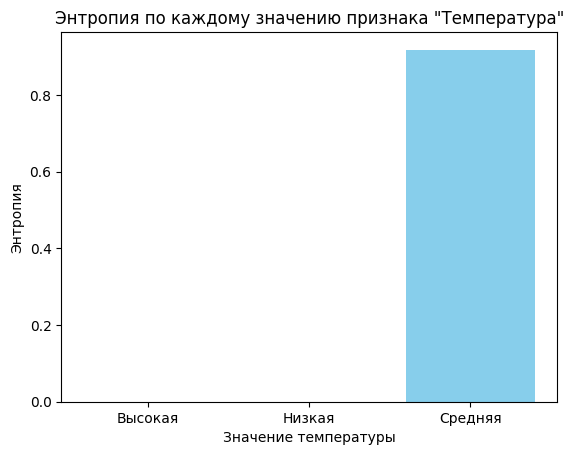

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
data = [
    ['Высокая', 'Да'],
    ['Высокая', 'Да'],
    ['Низкая', 'Нет'],
    ['Средняя', 'Нет'],
    ['Средняя', 'Да'],
    ['Высокая', 'Да'],
    ['Средняя', 'Нет'],
    ['Низкая', 'Нет'],
    ['Высокая', 'Да'],
    ['Низкая', 'Нет']
]

# Преобразование данных в numpy массив
data = np.array(data)

# Функция для вычисления энтропии
def entropy(class_labels):
    _, counts = np.unique(class_labels, return_counts=True)
    probabilities = counts / len(class_labels)
    return -np.sum(probabilities * np.log2(probabilities))

# Функция для вычисления условной энтропии
def conditional_entropy(data, feature_index, class_index):
    feature_values = np.unique(data[:, feature_index])
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[:, feature_index] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[:, class_index])
    return weighted_entropy

# Функция для вычисления соотношения прироста информации
def information_gain_ratio(data, feature_index, class_index):
    total_entropy = entropy(data[:, class_index])
    cond_entropy = conditional_entropy(data, feature_index, class_index)
    feature_entropy = entropy(data[:, feature_index])
    return (total_entropy - cond_entropy) / feature_entropy

# Признаки и классы
features = ['Температура']
classes = ['Играть в футбол?']
class_index = 1
feature_index = 0

# Вычисление прироста информации для признака "Температура"
gain_ratio = information_gain_ratio(data, feature_index, class_index)

print(f'Соотношение прироста информации для признака "Температура": {gain_ratio:.4f}')

# Визуализация
def plot_entropy():
    feature_values = np.unique(data[:, feature_index])
    entropies = []
    for value in feature_values:
        subset = data[data[:, feature_index] == value]
        entropies.append(entropy(subset[:, class_index]))

    plt.bar(feature_values, entropies, color='skyblue')
    plt.title('Энтропия по каждому значению признака "Температура"')
    plt.xlabel('Значение температуры')
    plt.ylabel('Энтропия')
    plt.show()

plot_entropy()

## Модель дерева решений CART

### Однострочное описание:
Использование индекса Джини (для классификации) или средней квадратичной ошибки (MSE, для регрессионного дерева) для поиска признаков, которые разделяют текущую вершину на две части на каждом шаге разбиения.

### a. Что такое MSE в регрессионном дереве решений?
На каждом шаге разбиения мы выбираем лучший признак $j$ и значение разделения $s$, чтобы разделить текущую область на две части: $T_1$ и $T_2$. Соответствующие предсказанные значения для каждого поддерева — $C_1$ и $C_2$.

$$
T_1(j,s) = \{x \mid x_j \leq s\}, \quad T_2(j,s) = \{x \mid x_j > s\}
$$
Средняя квадратичная ошибка (MSE) на каждом шаге разбиения рассчитывается как:

$$
MSE(j, s) = \sum_{x \in T_1} (y - C_1)^2 + \sum_{x \in T_2} (y - C_2)^2
$$

где $C_1$ и $C_2$ — это средние значения целевой переменной в подмножествах $T_1$ и $T_2$ соответственно.

### b. Что такое индекс Джини в классификационном дереве решений?
Предположим, что в наборе данных $D$ существует $K$ классов. $P_k$ — это вероятность класса $C_k$. Индекс Джини для набора данных $D$ рассчитывается как:

$$
Gini(D) = 1 - \sum_{k=1}^{K} P_k^2
$$

Индекс Джини для набора данных после разбиения на два подмножества $T_1$ и $T_2$ по признаку $A$ будет равен:

$$
Gini(D, A) = \frac{|T_1|}{|D|} \cdot Gini(T_1) + \frac{|T_2|}{|D|} \cdot Gini(T_2)
$$

где $Gini(T_1)$ и $Gini(T_2)$ — это индексы Джини для подмножеств $T_1$ и $T_2$, а $|T_1|$ и $|T_2|$ — их размеры.

### c. Реальная модель CART и алгоритм
На каждом шаге разбиения мы находим признак, который минимизирует индекс Джини (для классификации) или MSE (для регрессии) после разбиения.

**Входные данные модели:** набор данных $D$, набор признаков $A$, порог останова $e$.  
**Выходные данные модели:** дерево решений CART.

#### Рекуррентный алгоритм для классификационного дерева (похож на ID3/C4.5):
1. Если все образцы в наборе данных $D$ принадлежат одному классу $C_k$, остановить разбиение на этом узле и назначить конечному узлу класс $C_k$.
2. Для каждого признака $j$ в наборе $A$ мы перебираем все возможные значения признака $j$ и находим оптимальную точку разделения $s$, которая минимизирует индекс Джини. Пусть индекс Джини до разбиения равен $Gini_{before}$, а после разбиения — $Gini_{after}$.
   
   Как разделить данные:
   
$$
   T_1(j,s) = \{x \mid x_j \leq s\}, \quad T_2(j,s) = \{x \mid x_j > s\}
$$
   
   Индекс Джини до разбиения:

$$
   Gini_{before}(D) = 1 - \sum_{k=1}^{K} P_k^2
$$
   
   Как найти $Gini_{after}$:
   
$$
   Gini_{after}(D,j,s) = \frac{|T_1|}{|D|} \cdot Gini(T_1) + \frac{|T_2|}{|D|} \cdot Gini(T_2)
$$

3. Если уменьшение индекса Джини $Gini_{before} - Gini_{after}$ больше порога $e$, то мы разделяем данные по признаку $j$ и продолжаем разбиение для каждого подмножества $T_1$ и $T_2$. В противном случае разбиение останавливается на этом узле, и узлу присваивается класс, который встречается чаще всего.

#### Рекуррентный алгоритм для регрессионного дерева (аналогичный ID3/C4.5):
1. Если все образцы в $D$ имеют одинаковое значение целевой переменной $y$, остановить разбиение на этом узле и назначить конечному узлу значение $y$.
2. Для каждого признака $j$ в наборе $A$ перебираются все возможные значения признака $j$ и находится оптимальная точка разбиения $s$, которая минимизирует MSE. Пусть MSE до разбиения равен $MSE_{before}$, а после разбиения — $MSE_{after}$.

Как разделить данные:

$$
T_1(j,s) = \{x \mid x_j \leq s\}, \quad T_2(j,s) = \{x \mid x_j > s\}
$$

MSE до разбиения:

$$
MSE_{before} = \sum_{x \in D} (y - \hat{y})^2
$$

Как найти $MSE_{after}$:

$$
MSE_{after}(D,j,s) = \sum_{x \in T_1} (y - C_1)^2 + \sum_{x \in T_2} (y - C_2)^2
$$

3. Если уменьшение MSE $MSE_{before} - MSE_{after}$ больше порога $e$, то разбиение выполняется по признаку $j$, и для каждого подмножества $T_1$ и $T_2$ процесс повторяется рекурсивно. Если уменьшение MSE меньше или равно порогу $e$, разбиение останавливается, и узлу присваивается среднее значение целевой переменной для подмножества.

### Применение Scikit-learn

Функция дерева решений:

```python
class sklearn.tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False
)
```

**criterion**: строка, необязательно (по умолчанию = "gini"). Используется для выбора критерия разделения: `'gini'` — для индекса Джини, `'entropy'` — для информации о приросте (для дерева решений C4.5).

**splitter**: строка, необязательно (по умолчанию = "best"). `'best'` означает поиск по всем признакам и значениям для выбора наилучшего разбиения. `'random'` означает случайный выбор подмножества признаков для поиска наилучшего разбиения.

**max_depth**: int или None, необязательно (по умолчанию = None). Максимальная глубина дерева. Это ограничение на количество разбиений, чтобы предотвратить переобучение.

**min_samples_split** и **min_samples_leaf**: int, float, необязательно. Эти параметры регулируют, сколько образцов необходимо для дальнейшего разбиения (для min_samples_split) и для того, чтобы узел был конечным (для min_samples_leaf).

**min_impurity_decrease**: float, необязательно (по умолчанию = 0). Узел будет разделен, если уменьшение нечистоты больше или равно этому значению.




Для иллюстрации работы модели **CART (Classification and Regression Tree)** приведем числовой пример, разбирая шаги построения дерева классификации с использованием индекса Джини (Gini index). Рассмотрим задачу классификации на основе набора данных.



## Пример:
### Данные:
У нас есть набор данных с 10 объектами, каждый из которых имеет один числовой признак $x$ и принадлежит одному из двух классов ($C_1$ или $C_2$):

| $x$ | Класс |
|--|-|
| 2.0    | $C_1$ |
| 3.0    | $C_1$ |
| 5.0    | $C_2$ |
| 7.0    | $C_2$ |
| 8.0    | $C_1$ |
| 9.0    | $C_1$ |
| 11.0   | $C_2$ |
| 12.0   | $C_2$ |
| 14.0   | $C_1$ |
| 16.0   | $C_2$ |



### Задача:
Построить дерево классификации, разделив данные на основе значения признака $x$, чтобы минимизировать индекс Джини. Рассчитаем шаги на первом разбиении.



### Шаг 1: Расчет общего индекса Джини
Индекс Джини для всего набора данных рассчитывается по формуле:  
$$
Gini(D) = 1 - \sum_{k=1}^K p_k^2,
$$
где $p_k$ — доля объектов, принадлежащих классу $k$ в наборе данных $D$.

В нашем примере:
- Общее число объектов $N = 10$.
- Класс $C_1$: 5 объектов ($p_1 = \frac{5}{10} = 0.5$).
- Класс $C_2$: 5 объектов ($p_2 = \frac{5}{10} = 0.5$).

$$
Gini(D) = 1 - (0.5^2 + 0.5^2) = 1 - 0.25 - 0.25 = 0.5.
$$



### Шаг 2: Определение возможных точек разбиения
Точки разбиения $s$ выбираются между соседними значениями признака $x$. Возможные точки разбиения:
$$
s \in \{2.5, 4.0, 6.0, 7.5, 8.5, 10.0, 11.5, 13.0, 15.0\}.
$$



### Шаг 3: Расчет индекса Джини для каждого разбиения
Для каждой точки разбиения $s$, мы делим данные на два подмножества:
- $T_1(s) = \{x \leq s\}$,
- $T_2(s) = \{x > s\}$.

Индекс Джини после разбиения рассчитывается как:
$$
Gini_{after} = \frac{|T_1|}{|D|} Gini(T_1) + \frac{|T_2|}{|D|} Gini(T_2),
$$
где $Gini(T_1)$ и $Gini(T_2)$ рассчитываются по той же формуле, что и $Gini(D)$.

#### Пример: Точка разбиения $s = 7.5$
1. Разделение:
   - $T_1(7.5) = \{2.0, 3.0, 5.0, 7.0\}$,
   - $T_2(7.5) = \{8.0, 9.0, 11.0, 12.0, 14.0, 16.0\}$.

2. Расчет индекса Джини для $T_1(7.5)$:
   - $N_1 = 4$ (число объектов),
   - $p_1(C_1) = \frac{2}{4} = 0.5$, $p_1(C_2) = \frac{2}{4} = 0.5$,
   - $Gini(T_1) = 1 - (0.5^2 + 0.5^2) = 0.5$.

3. Расчет индекса Джини для $T_2(7.5)$:
   - $N_2 = 6$ (число объектов),
   - $p_2(C_1) = \frac{3}{6} = 0.5$, $p_2(C_2) = \frac{3}{6} = 0.5$,
   - $Gini(T_2) = 1 - (0.5^2 + 0.5^2) = 0.5$.

4. Общий индекс Джини после разбиения:
$$
Gini_{after} = \frac{4}{10} \cdot 0.5 + \frac{6}{10} \cdot 0.5 = 0.2 + 0.3 = 0.5.
$$



### Шаг 4: Выбор оптимального разбиения
Аналогично рассчитываем $Gini_{after}$ для других точек $s$. Выбираем $s$, при котором разница:
$$
\Delta Gini = Gini_{before} - Gini_{after},
$$
максимальна.



### Шаг 5: Продолжение алгоритма
После выбора оптимального разбиения, процесс рекурсивно продолжается для каждого подмножества $T_1$ и $T_2$, пока не будут выполнены условия остановки (например, минимальный размер узла, чистота узла и т.д.).

Реализация на Python


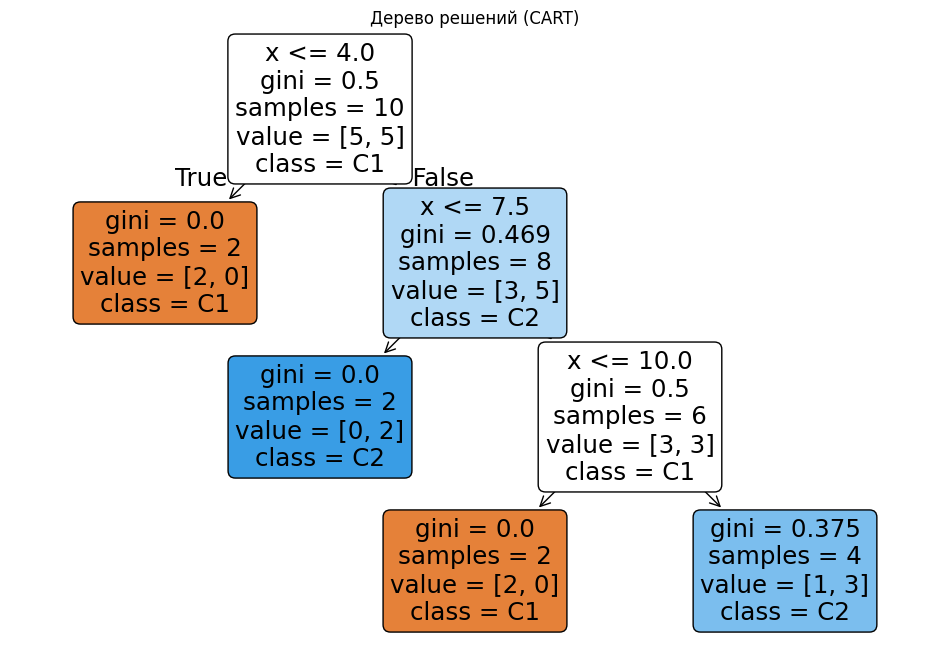

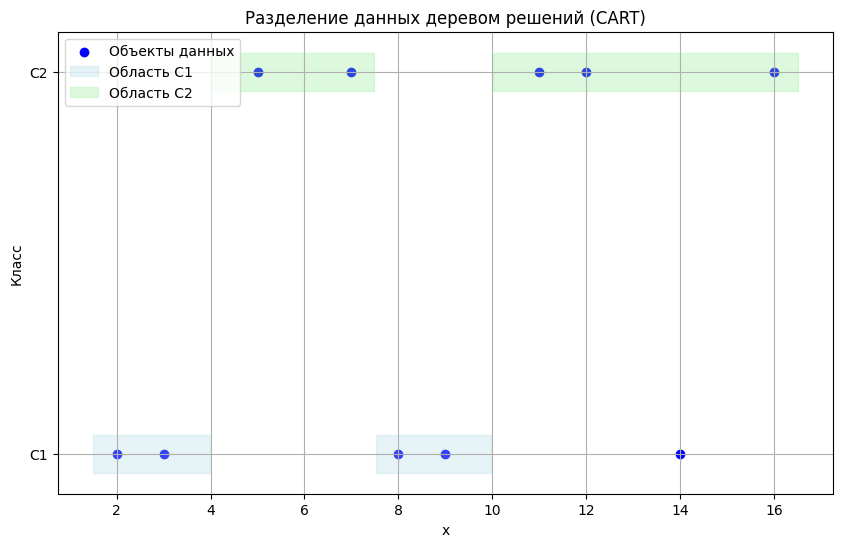

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Данные
X = np.array([2.0, 3.0, 5.0, 7.0, 8.0, 9.0, 11.0, 12.0, 14.0, 16.0]).reshape(-1, 1)
y = np.array([1, 1, 2, 2, 1, 1, 2, 2, 1, 2])  # 1: C1, 2: C2

# Создание и обучение модели CART
cart_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
cart_model.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(cart_model, feature_names=['x'], class_names=['C1', 'C2'], filled=True, rounded=True)
plt.title("Дерево решений (CART)")
plt.show()

# Визуализация разделений
plt.figure(figsize=(10, 6))
x_vals = np.linspace(1.5, 16.5, 500).reshape(-1, 1)
y_preds = cart_model.predict(x_vals)

# Отображение точек данных
plt.scatter(X, y, color='blue', label='Объекты данных')

# Визуализация областей
plt.fill_between(x_vals.ravel(), 0.95, 1.05, where=(y_preds == 1), color='lightblue', alpha=0.3, label='Область C1')
plt.fill_between(x_vals.ravel(), 1.95, 2.05, where=(y_preds == 2), color='lightgreen', alpha=0.3, label='Область C2')

# Подписи и оформление
plt.yticks([1, 2], ['C1', 'C2'])
plt.xlabel('x')
plt.ylabel('Класс')
plt.title('Разделение данных деревом решений (CART)')
plt.legend()
plt.grid(True)
plt.show()